<font size = 5><u><b> Model Development </u></b><br> </font>

<p> In data analytics, we often use <b>Model Development</b> to help us predict future observations from the data we have.<br>
A model will help us understand the exact relationship between different variables and how these variables are used to predict the result. </p>

We will go through the following things in this notebook: <br>
            - Linear Regression -- Regression Plot, Residual Plot<br> 
            - Multiple Linear Regression -- Distribution Plot<br>
            - Polynomial Regression, Pipelines<br>
            - Quantitative In-Sample Evaluation (R-squared, MSE)<br>
            - Prediction and Decision Making -- which model is best suited?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("automobileEDA.csv", header=0)

<h3> Linear Regression and Multiple Linear Regression </h3>
<p><b>Simple Linear Regression</b> helps us understand the relationship between two variables:<br>
- The predictor/independent variable (X) <br>
- The response/dependent variable (that we want to predict)(Y) </p>

<p>The result of Linear Regression is a linear function -- yhat = a + bX -- that predicts the response (dependent) variable as a function of the predictor (independent) variable. <br>
Here a is the intercept on y axis and b is slope of the reg line.

In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

X = df[['highway-mpg']]
Y = df['price']
lm.fit(X, Y)

#making a prediction
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [13]:
print("intercept a =", lm.intercept_)
print("coefficient b =", lm.coef_[0])

intercept a = 38423.305858157386
coefficient b = -821.7333783219252


<b> Multiple Linear Regression</b> is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. <br>
<br> 
The equation is -- yhat = a + b1.X1 + b2.X2 + b3.X3 + .... + bn.Xn

In [14]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])
print("intercept a =", lm.intercept_)
print("coefficient b =", lm.coef_)

intercept a = -15806.624626329198
coefficient b = [53.49574423  4.70770099 81.53026382 36.05748882]


The next step is <b> Model Evaluation </b> and choosing the best one out of those we deplyed. One way to do this is by using a visualization. <br> <br>
An excellent way to visualize the fit of a simple linear regression model is by using <b> Regression Plots. </b>

(0.0, 48176.09083833549)

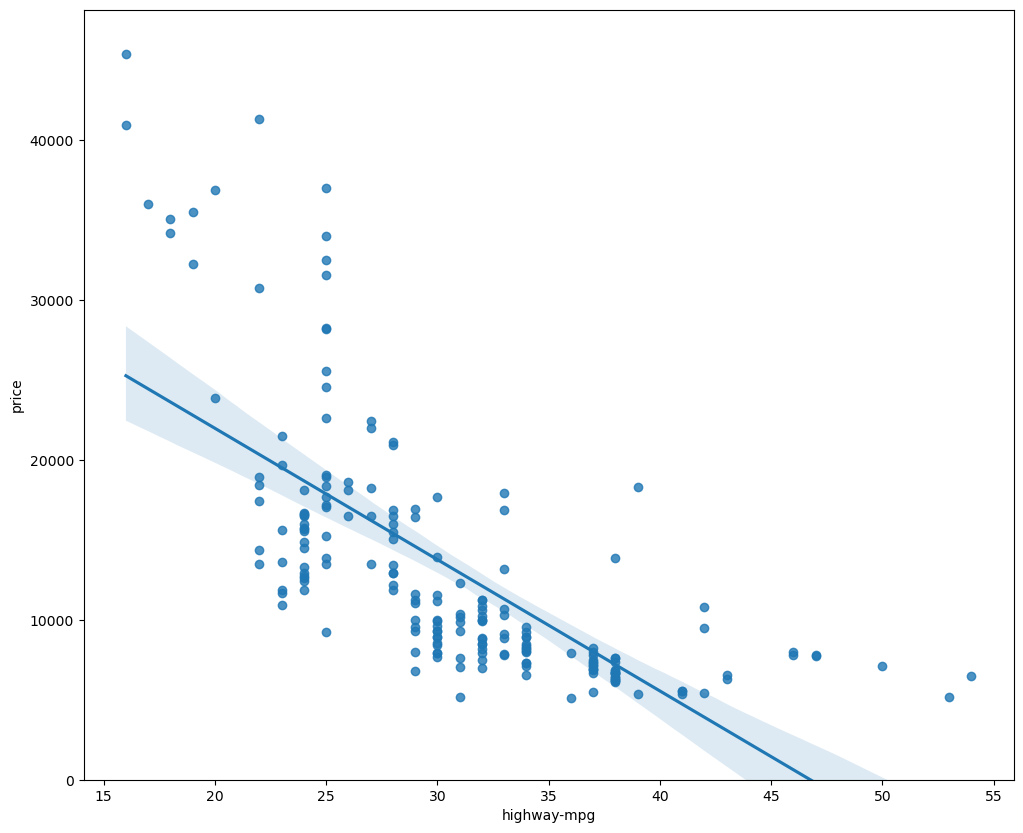

In [15]:
import seaborn as sns
%matplotlib inline 
plt.figure(figsize=(12, 10))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

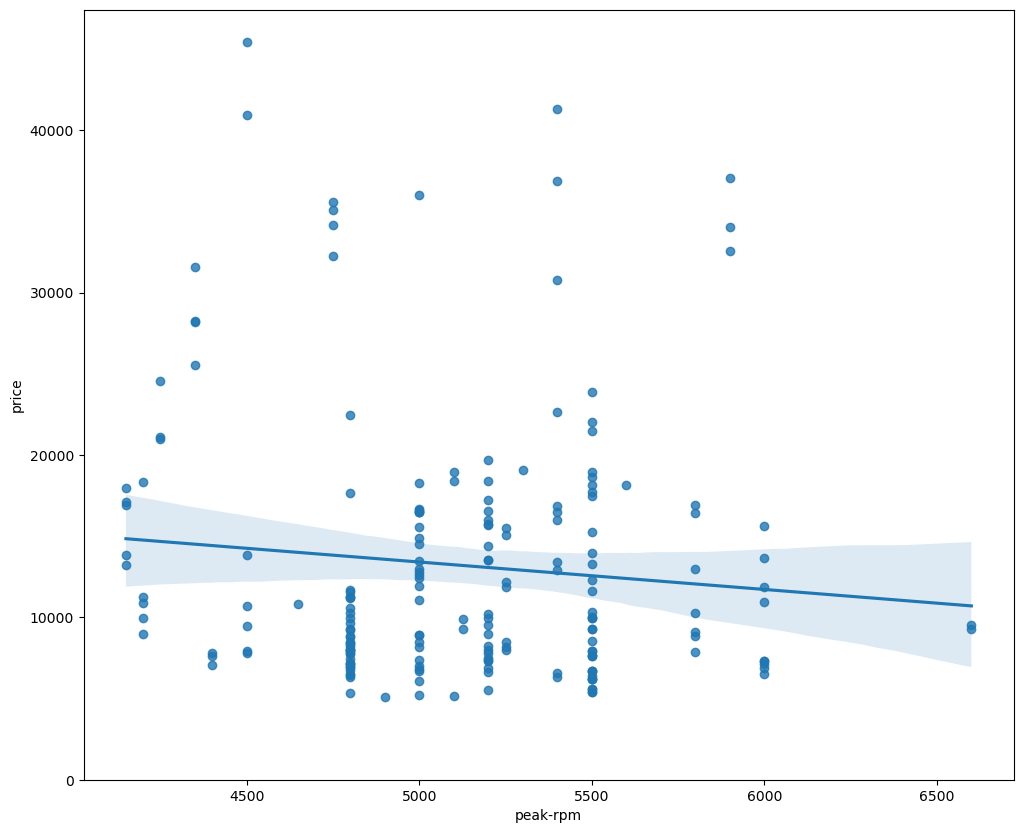

In [17]:
plt.figure(figsize=(12, 10))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

A good way to visualize the variance of the data is to use a <b>residual plot.</b> <br>
<br>The difference between the observed value (y) and the predicted value (Yhat) is called the <b>residual (e).</b> When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

<p> If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. <br>
Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data. </p>

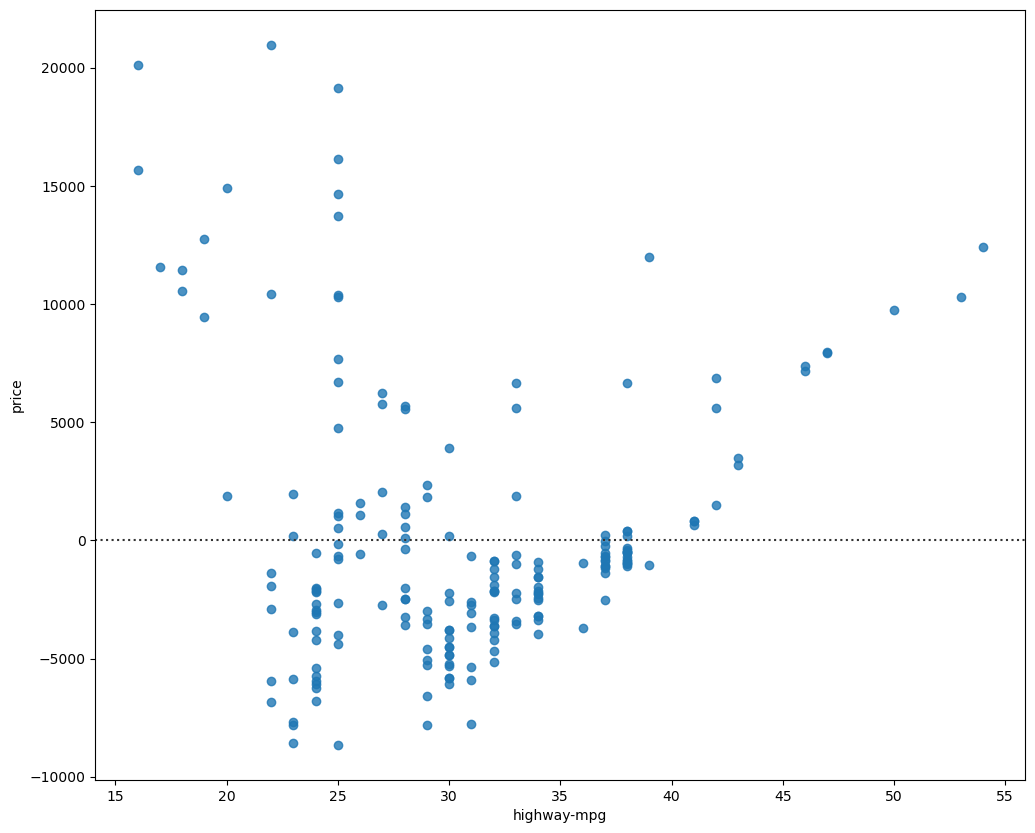

In [18]:
plt.figure(figsize=(12, 10))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

One way to look at the fit of the multiple linear model is by looking at the <b>Distribution Plot. </b> We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

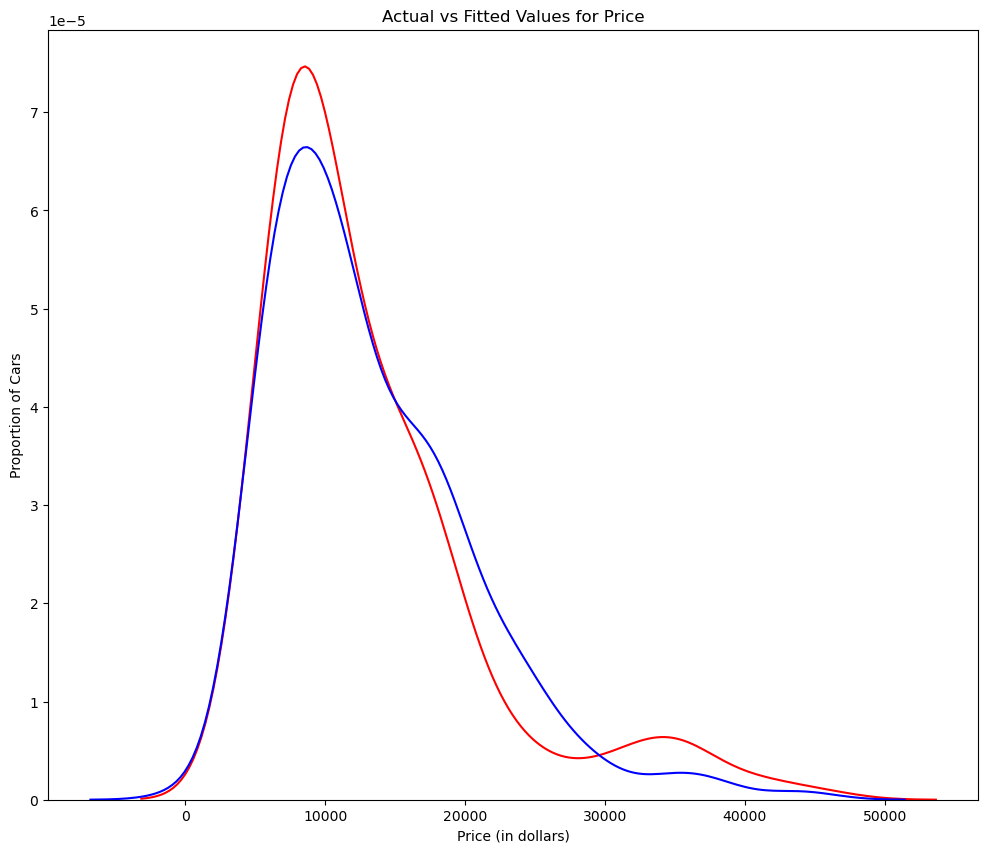

In [20]:
Y_hat = lm.predict(Z)
plt.figure(figsize=(12, 10))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<h3> Polynomial Regression </h3>
Polynomial regression is a particular case of the general linear regression model or multiple linear regression models with higher-order terms of the predictor variables X.

In [21]:
#function to plot the data
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


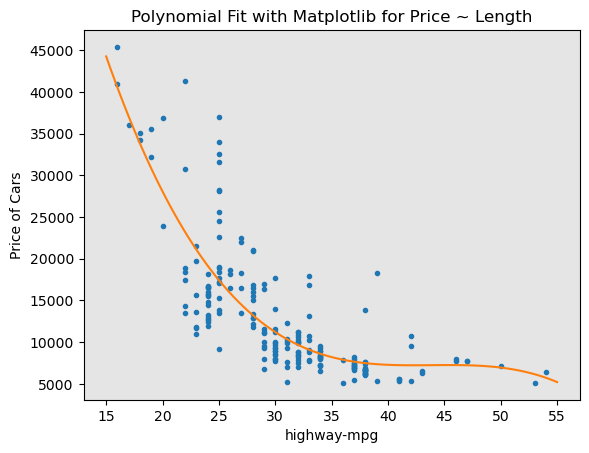

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [22]:
#polyfit to fit the polynomial and poly1d to display the poly function
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

PlotPolly(p, x, y, 'highway-mpg')
np.polyfit(x,y, 3)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(Z)

#before transformation
Z.shape


(201, 4)

In [27]:
#after transformations
Z_pr.shape

(201, 15)

<h3> Pipelines </h3>
Data Pipelines simplify the steps of processing the data. We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [31]:
#StandardScaler only takes float inputs
#we can normalize the data, perform a transform and fit the model simultaneously
Z= Z.astype(float)
pipe.fit(Z,y)
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<h3> In-Sample Evaluation </h3> 
<p> Two very important measures that are often used in Statistics to determine the quantitative accuracy of a model are: </p>

<p><b>R-Squared</b> also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line. <br>
The model with the higher R-squared value is a better fit for the data. </p>

<p><b>Mean Squared Error (MSE)</b> easures the average of the squares of errors.<br> The model with the smallest MSE value is a better fit for the data.</p>

In [32]:
#Calculating R-squared

#X=highway-mpg and Y=price
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


In [33]:
#Calculating MSE
from sklearn.metrics import mean_squared_error
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]
The mean square error of price and predicted value is:  31635042.944639895


<h3> Prediction and Decision Making </h3>
We will use the method predict to produce a prediction.


predicted values= [37601.57247984 36779.83910151 35958.10572319 35136.37234487
 34314.63896655]


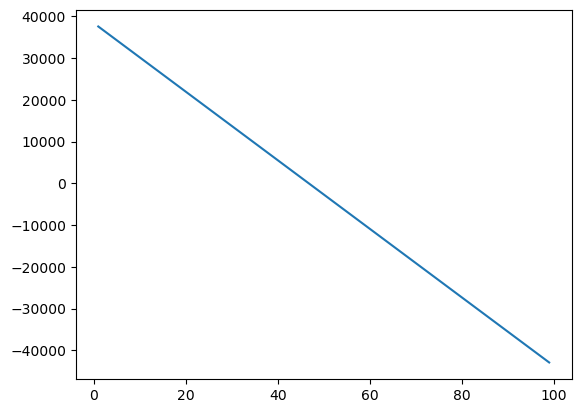

In [34]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

new_input=np.arange(1, 100, 1).reshape(-1, 1)
lm.fit(X, Y)
yhat=lm.predict(new_input)
print("predicted values=", yhat[0:5])
plt.plot(new_input, yhat)
plt.show()

<h3> <U>Decision Making: Determining a Good Model Fit </U></h3>
We have gathered the following data and now we can compare the models to reach the one that is most suitable.
<p> Simple Linear Regression (SLR) - Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>

<p>Multiple Linear Regression (MLR) - Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>

<p>Polynomial Fit - Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h4> Simple Linear Regression vs Multiple Linear Regression </h4>
<font size = 3> <ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>


This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

<h4> Simple Linear Regression vs Polynomial Fit</h4>
<font size = 3><ul>
    <li><b>MSE</b>: We can see that Polynomial Fitis MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR. </li>
</ul>

<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>


<h4>Multiple Linear Regression (MLR) vs. Polynomial Fit</h4>
<font size = 3><ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


<h3><u> Conclusion </u> </h3>
Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.